In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Reading the input files
df = pd.read_csv("../../../../Data/Sequence CSVs/DENV1 - DF.csv", header=None)
dss = pd.read_csv("../../../../Data/Sequence CSVs/DENV1 - DSS.csv", header=None)
dhf = pd.read_csv("../../../../Data/Sequence CSVs/DENV1 - DHF.csv", header=None)

# Printing the shape of the data
print("The shape of DF data is:", str(df.shape))
print("The shape of DSS data is:", str(dss.shape))
print("The shape of DHF data is:", str(dhf.shape))

The shape of DF data is: (421, 1)
The shape of DSS data is: (1, 1)
The shape of DHF data is: (50, 1)


In [3]:
# Making the disease label column
df_disease = np.repeat(0, 421)
dss_disease = np.repeat(1, 1)
dhf_disease = np.repeat(1, 50)

# Attaching the "Disease" label column to the input
df["Disease"] = df_disease
dss["Disease"] = dss_disease
dhf["Disease"] = dhf_disease

# Renaming the columns
df = df.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dss = dss.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dhf = dhf.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
result = pd.concat([df, dss, dhf], axis = 0, sort = False)
print("The combined shape of the given data is:", str(result.shape))

# Taking a peek at the combined data
result = result.sample(frac = 1)
print(result.head())

The combined shape of the given data is: (472, 2)
                                              Sequence  Disease
211  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0
182  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0
418  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0
409  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0
258  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

result['words'] = result.apply(lambda x: getKmers(x['Sequence']), axis=1)
result = result.drop('Sequence', axis=1)

result_texts = list(result['words'])
for item in range(len(result_texts)):
    result_texts[item] = ' '.join(result_texts[item])

The shape of y is: (472,)


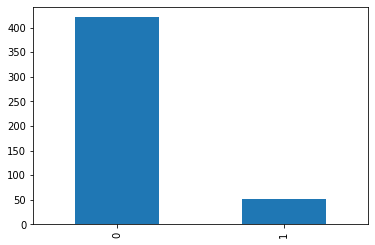

In [6]:
# Creating y and printing the shape of it
y = result.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
result["Disease"].value_counts().sort_index().plot.bar()

In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(result_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (472, 39232)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of C for Logistic Regression
Tree_list = [10, 100, 1000, 5000]
# empty list to store scores
RF_scores = []

In [10]:
from sklearn.ensemble import RandomForestClassifier
# 1. we will loop through reasonable values of k
for trees in Tree_list:
    # 2. run RandomForestClassifier with trees trees
    lr = RandomForestClassifier(n_estimators = trees, criterion = 'entropy', random_state = 0)
    # 3. obtain cross_val_score for RandomForestClassifier with trees trees
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for trees trees to RF_scores list
    RF_scores.append(scores.mean())
    
    print("The score for trees  =", trees, "is:", scores.mean())

The score for trees  = 10 is: 0.9005210594876247
The score for trees  = 100 is: 0.9004342162396872
The score for trees  = 1000 is: 0.9046895353886235
The score for trees  = 5000 is: 0.9046895353886235


Length of list 5
Max of list 0.9046895353886235


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

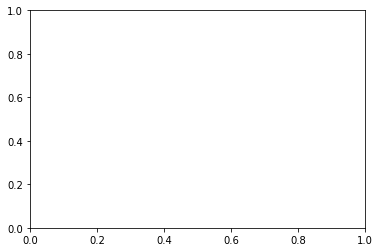

In [11]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(RF_scores))
print('Max of list', max(RF_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(Tree_list, RF_scores)dd
plt.xlabel('Value of number of trees for Random Forest')
plt.ylabel('Cross-validated accuracy')